# Sheet 1: Error Propagation

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from resample.bootstrap import variance

# create instance of pseudo-random number generator with fixed seed = 1
rng = np.random.default_rng(seed=1)

---

## Task 1: Error Propagation
Consider the function $y = f(x)$, $y = 1 + a_1x + a_2x^2$ with parameters $a_1 = 2.0 ± 0.2$, $a_2 = 1.0 ± 0.1$ and correlation coefficient $ρ = −0.8$.

### 1.1

Write down the covariance matrix for $a_1$ and $a_2$.

---

In [29]:
rho = -.8
sigma = [.2, .1]
cov = [.2**2, .2*.1 * rho, .2 * .1 * rho, .1**2]

print("Covariance matrix:")
cov = np.array(cov).reshape(2, 2)
print(cov)

Covariance matrix:
[[ 0.04  -0.016]
 [-0.016  0.01 ]]


$$
COV_{ij} = \rho_{ij} \sigma_i \sigma_j =
\begin{pmatrix}
0.04 & -0.016 \\
-0.016 & 0.01
\end{pmatrix}
$$

---
### 1.2
Compute the uncertainty of $y$ analytically using error propagation. 

---

$$\frac{\partial f}{\partial a_1} = x, \\\frac{\partial f}{\partial a_2} =  x^2. $$

$$\sigma_y^2=\sum_{ij} \frac{\partial y}{\partial a_i}\frac{\partial y}{\partial a_j}COV(a)_{ij} = C_{11}x^2+2C_{12}x^3+C_{22}x^4=x^2(\sigma_{a_1}^2+x^2\sigma_{a_2}+2\rho\sigma_{a_1}\sigma_{a_2}x) \\ \rightarrow \sigma_y=|x|\sqrt{(...)}

---
### 1.3

Compare the numerical result for $\sigma_y$ for the two cases where you a) ignore the correlation $\rho$ by setting it to zero, and b) correctly include the correlation. Compute $\sigma_y$ for $x \in [-3, 3]$ and plot the results.

In practice, correlations are often unknown. Is it conservative to set the correlation to zero? A conservative error estimate is always larger than the exact error.

---

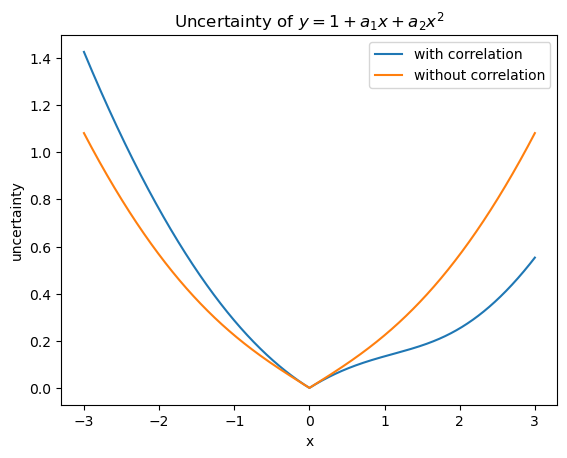

In [30]:
def function(x, a1, a2):
    return 1 + a1 * x + a2 * x ** 2


def uncertainty_correlation(x, sigma1, sigma2, rho):
    return np.abs(x) * np.sqrt(sigma1 ** 2 + x ** 2 * sigma2 ** 2 + 2 * rho * sigma1 * sigma2 * x)


def uncertainty_noCorrelation(x, sigma1, sigma2):
    return np.abs(x) * np.sqrt(sigma1 ** 2 + x ** 2 * sigma2 ** 2)

x = np.linspace(-3, 3, 10_000)
plt.plot(x, uncertainty_correlation(x, sigma[0], sigma[1], rho), label='with correlation')
plt.plot(x, uncertainty_noCorrelation(x, sigma[0], sigma[1]), label='without correlation')
plt.xlabel('x')
plt.ylabel('uncertainty')
plt.title('Uncertainty of $y = 1 + a_1 x + a_2 x^2$')
plt.legend()
# plt.grid()
plt.show()

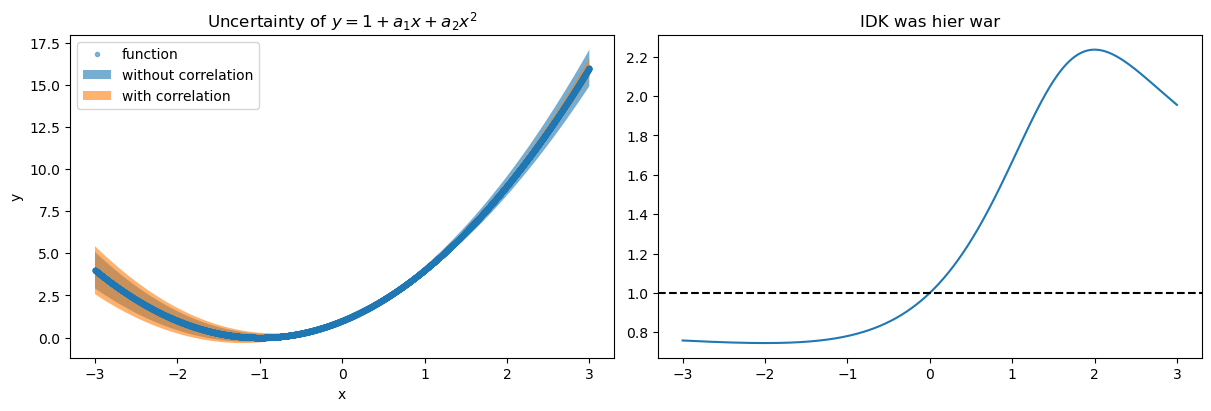

In [31]:
data_y = function(x, 2, 1)
err_y_no_correlation = uncertainty_noCorrelation(x, sigma[0], sigma[1])
err_y_correlation = uncertainty_correlation(x, sigma[0], sigma[1], rho)


fig, ax = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True, sharex=True)
plt.sca(ax[0])

# plt.plot(x, data_y)
plt.plot(x, data_y, ".", alpha=0.5, label='function')
plt.fill_between(x, data_y - err_y_no_correlation, data_y + err_y_no_correlation, alpha=0.6, label='without correlation')
plt.fill_between(x, data_y - err_y_correlation, data_y + err_y_correlation, alpha=0.6, label='with correlation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uncertainty of $y = 1 + a_1 x + a_2 x^2$')
plt.legend()

plt.sca(ax[1])
plt.plot(x, err_y_no_correlation/err_y_correlation, label='data')
plt.axhline(1, color='black', linestyle='--', label='no correlation')
plt.title("IDK was hier war")
plt.show()

---
### 1.4
Compute the uncertainty of $y$ numerically using Monte-Carlo simulation under the assumption that $a_1$ and $a_2$ are normally distributed.

Generate pairs $(a_{1,i}, a_{2,i})$ from the given values of $a_1$ and $a_2$ and their covariance matrix and visualize these pairs with a scatter plot or 2D histogram.

Use `help(rng)` and make yourself familiar with the available methods to draw random numbers from a variety of statistical distributions. Locate a method that generates correlated normally distributed numbers directly.

---

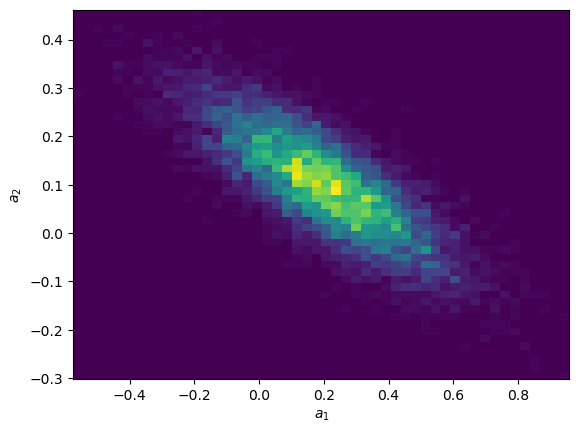

In [42]:
data_a1, data_a2 = rng.multivariate_normal((sigma[0], sigma[1]), cov, size=10_000).T

plt.hist2d(data_a1, data_a2, bins=50)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.show()

---

### 1.5

Determine the distribution of $y_i$-samples for $x = \{-1, 0, +1\}$ and compare their mean and variance with the results of the analytical calculation.

---

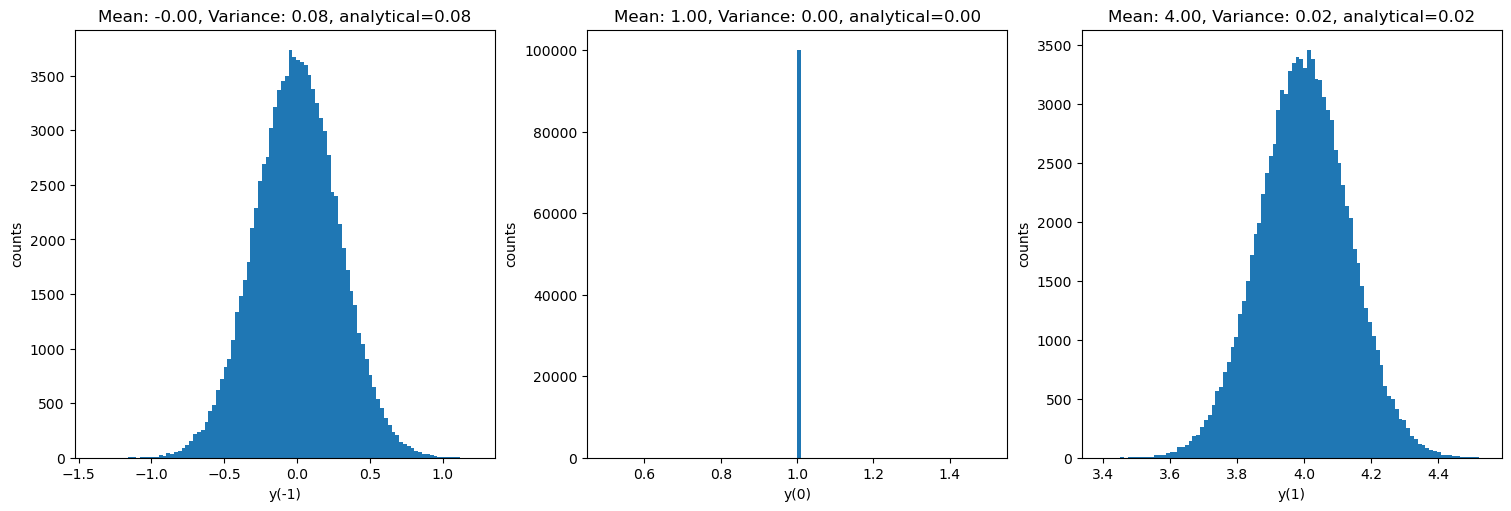

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

for idx, x_val in enumerate((-1, 0, 1)):
    plt.sca(ax[idx])
    data_y = function(x_val, data_a1, data_a2)
    mean = np.mean(data_y)
    variance = np.var(data_y)
    analytical_var = uncertainty_correlation(x_val, sigma[0], sigma[1], rho) ** 2

    plt.hist(data_y, bins=100)
    plt.xlabel(f'y({x_val})')
    plt.ylabel('counts')
    plt.title(f'Mean: {mean:.2f}, Variance: {variance:.2f}, analytical={analytical_var:.2f}')

---

## Task 2: Error Propagation with Transformation
Now consider the following reparametrisation of $y = f(x)$:
    
$$y = 1 + \frac{x(1+x)}{b_1} + \frac{x(1-x)}{b_2}$$

### 2.1
Determine analytically the transformed parameters $b_1$ and $b_2$ and their covariance matrices.

$$a_1 = \left(\frac1{b_1}+\frac1{b_2}\right), a_2 = \left(\frac1{b_1}-\frac 1{b_2}\right), \\
b_1 = \frac{2}{a_1+a_2}, b_2 =\frac{2}{a_1-a_2}.$$

---

### 2.2
Determine the covariance matrix of the transformed parameters by Monte-Carlo simulation and compare with the analytical calculation.

_Hint_: If the covariance matrix is not what you expect, plot histograms of the transformed parameters and look for suspicious properties.

---

In [51]:
def trafo(a):
    a1, a2 = a
    b1 = 2 / (a1 + a2)
    b2 = 2 / (a1 - a2)
    return np.array([b1, b2])


a1, a1_err = 2.0, 0.2
a2, a2_err = 1.0, 0.1

denom1 = (a1 + a2) ** 2
denom2 = (a1 - a2) ** 2

J = np.array([[-2 / denom1, -2 / denom1], [-2 / denom2, 2 / denom2]])
cov_b = J @ cov @ J.T

data_a1, data_a2 = rng.multivariate_normal((a1, a2), cov, size=100_000).T

In [53]:
data_b1, data_b2 = trafo((data_a1, data_a2))
np.cov(data_b1, data_b2)/cov_b

array([[ 1.01445493,  1.51122509],
       [ 1.51122509, 29.14960403]])

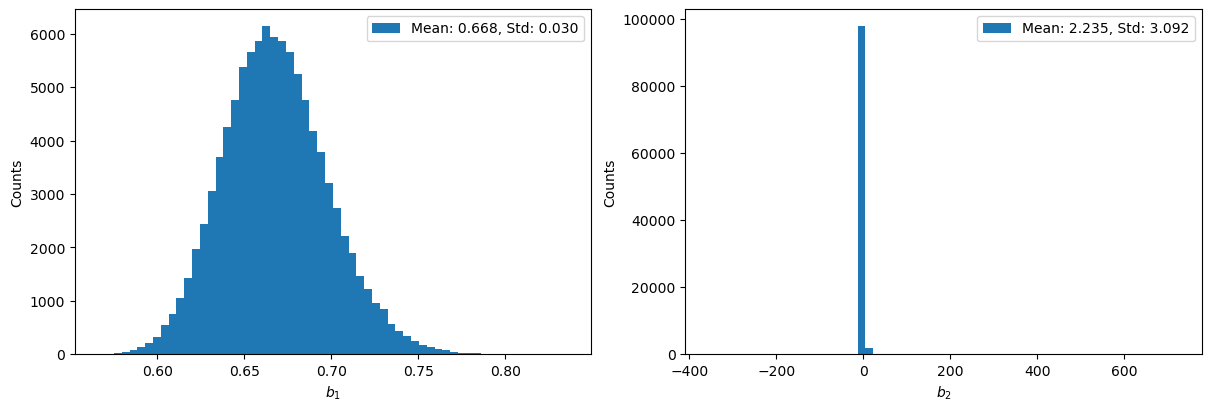

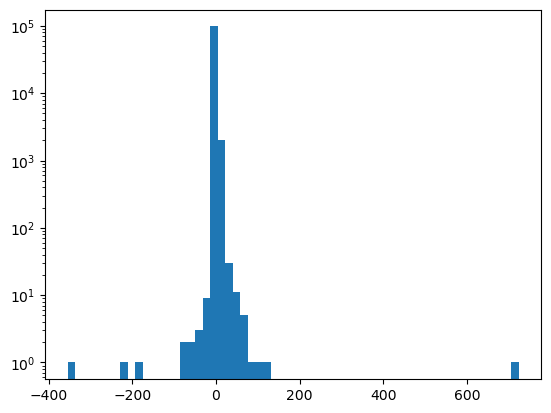

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
plt.sca(ax[0])
plt.hist(data_b1, bins=60, label=f'Mean: {np.mean(data_b1):.3f}, Std: {np.std(data_b1):.3f}')
plt.xlabel('$b_1$')
plt.ylabel('Counts')
plt.legend()

plt.sca(ax[1])
plt.hist(data_b2, bins=60, label=f'Mean: {np.mean(data_b2):.3f}, Std: {np.std(data_b2):.3f}')
plt.xlabel('$b_2$')
plt.ylabel('Counts')
plt.legend()
plt.show()

plt.figure()
plt.hist(data_b2, bins=60)
plt.yscale('log')

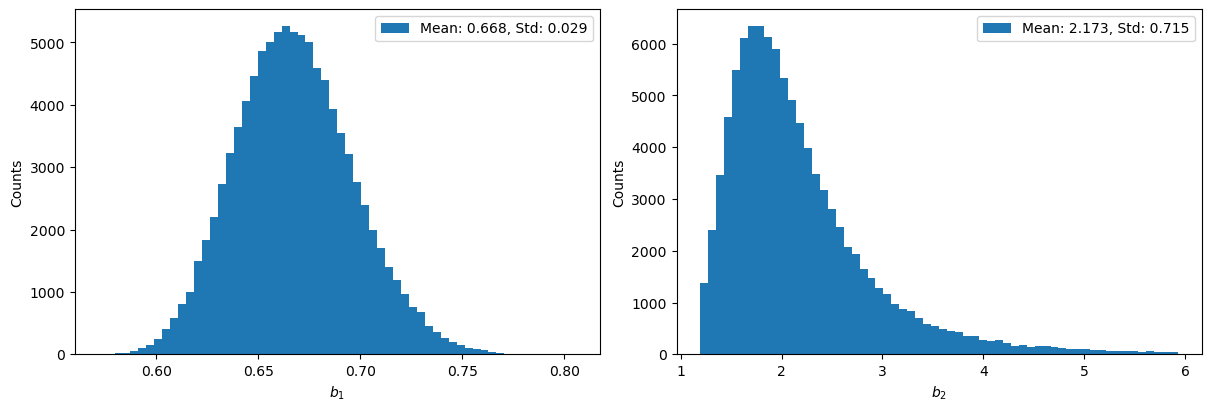

In [61]:
b2_low, b2_high = np.percentile(data_b2, [1, 99])

mask = np.logical_and(b2_low < data_b2, data_b2 < b2_high)
data_b1_cut = data_b1[mask]
data_b2_cut = data_b2[mask]

fig, ax = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
plt.sca(ax[0])
plt.hist(data_b1_cut, bins=60, label=f'Mean: {np.mean(data_b1_cut):.3f}, Std: {np.std(data_b1_cut):.3f}')
plt.xlabel('$b_1$')
plt.ylabel('Counts')
plt.legend()

plt.sca(ax[1])
plt.hist(data_b2_cut, bins=60, label=f'Mean: {np.mean(data_b2_cut):.3f}, Std: {np.std(data_b2_cut):.3f}')
plt.xlabel('$b_2$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [62]:
np.cov(data_b1_cut, data_b2_cut) / cov_b

array([[0.93370082, 1.09762001],
       [1.09762001, 1.5578335 ]])

---

## Task 3: Bias

Consider the transformation $y = f(x) = \sin(x)$ for a normally distributed $x$ with $\bar x = 0.8 \pm 0.3$.

In this case, $f(\bar x)$ is not equal to $\bar y$, the mean of the $y$-distribution, since $f(x)$ is not linear.

### 3.1
Calculate the bias $f(\bar x) - \bar y$ using the approximate formula from the lecture and subtract the bias from the naive result $f(\bar x)$.


---

$$f(\bar x)=\frac 12\sin(x)\cdot \sigma_x^2

In [78]:
x, x_err = .8, .3
var_x = .3**2

y = np.sin(x)
d2f_dx2 = -np.sin(x)
bias = -1/2 * d2f_dx2 * var_x
print(f"Naive result: {y:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Corrected result: {y - bias:.3f}")

Naive result: 0.717
Bias: 0.032
Corrected result: 0.685


---
## 3.2
Check your calculation by Monte-Carlo simulation, by comparing the corrected function result with the mean of the transformed sample.

---

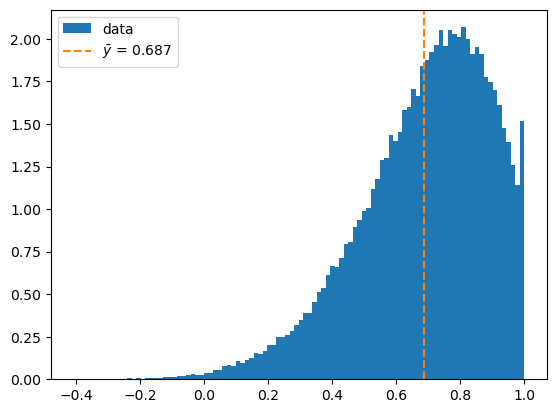

In [83]:
data_x = rng.normal(.8, .3, size=100_000)
data_y = np.sin(data_x)

plt.hist(data_y, bins=100, density=True, label='data')
plt.axvline(np.mean(data_y), color='C1', linestyle='--', label=f"$\\bar y$ = {np.mean(data_y):.3f}")
plt.legend()
plt.show()

---

## Task 4: Bootstrapping method

We apply the bootstrap method to two simple estimators.

### 4.1

Compute the uncertainties of the arithmetic mean and the median on the sample $v =$ [20, 1, 5, 1, 3, 2, 2, 5, 4, 1, 10, 2, 3] with the bootstrap method.

A simple algorithm to generate a bootstrap sample for an estimator is as follows:
  * Generate $m$ bootstrap samples of the same size by drawing random numbers from the original sample with replacement.  
    If the original sample has size $n$, a simple technique to obtain one bootstrap sample is this algorithm:
    * Repeat $n$ times:
      - Generate a random integer index $k < n$ from a uniform distribution.
      - Add `v[k]` to the current bootstrap sample, where `v` is the array that holds the original sample.
    * Compute the estimator on the bootstrap sample and store the result in an array.

You thus get a sample of bootstrapped estimator values of size $m$. You can compute the unbiased standard deviation to  
estimate the uncertainty of the estimator or compute quantiles which correspond to confidence intervals.

Plot a histogram of the bootstrapped means and medians. Calculate the unbiased standard deviation for each sample.  
For the arithmetic mean, the analytical uncertainty estimate is well-known, it is the unbiased standard deviation computed   
from the original sample divided by $\sqrt{n}$. Compare this to the bootstrapped estimate.

_Hint_: The unbiased standard deviation is obtained in Numpy with `np.std(my_array, ddof=1)`.

---

---

### 4.2

Check your result by using the function `variance` from `resample.bootstrap`. You need to take the square-root of the variance to get the standard deviation. Use the keyword `size` to increase the number of bootstrap samples to 10000.

---